# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Import Open Weather Map Wrapper
import openweathermapy.core as owm

# Set up list and parameters
weather_json = []
params = {'units' : 'imperial', 'appid' : api_key}

# Create a loop to request all cities in list
for city in cities:
    try:
        weather_json.append(owm.get_current(city, **params))
    except:
        print("Record Not Found")
    print(f"Records for {city} were found")

Record Not Found
Records for taolanaro were found
Records for kapaa were found
Records for wiarton were found
Records for ribeira grande were found
Records for rikitea were found
Records for puerto ayora were found
Records for atuona were found
Records for saldanha were found
Records for cairns were found
Records for ushuaia were found
Records for punta arenas were found
Records for vaini were found
Records for yellowknife were found
Records for tuktoyaktuk were found
Records for turukhansk were found
Records for hilo were found
Records for oranjemund were found
Records for matagami were found
Records for cidreira were found
Records for busselton were found
Records for saint-andre-avellin were found
Records for iqaluit were found
Records for dawei were found
Records for norman wells were found
Records for bambous virieux were found
Records for saint-philippe were found
Records for buchanan were found
Records for luganville were found
Records for skibbereen were found
Records for tuatap

In [13]:
# Check how many valid cities
len(weather_json)

['coord',
 'weather',
 'base',
 'main',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'visibility',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'wind',
 'rain',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'visibility',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod',
 'coord',
 'weather',
 'base',
 'main',
 'wind',
 'rain',
 'cloud

In [5]:
# Set up variables to capture data
lat = []
name = []
temp = []
clouds = []
humidity = []
wind = []
country = []
i = 0

# Loop through JSON to capture data
for i, v in enumerate weather_json:
    lat.append(weather_json[i]['coord']['lat'])
    name.append(weather_json[i]['name'])
    temp.append(weather_json[i]['main']['temp'])
    clouds.append(weather_json[i]['clouds']['all'])
    humidity.append(weather_json[i]['main']['humidity'])
    wind.append(weather_json[i]['wind']['speed'])
    country.append(weather_json[i]['sys']['country'])

TypeError: 'int' object is not iterable

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary with all the info collected
weather_dict = {'city': name,
                'country' : country,
               'latitude' : lat,
               'Temperature': temp,
               'Cloudiness %' : clouds,
               'Humidity %': humidity,
               'Wind Speed': wind}

# Create DataFrame and export it to csv file
weather_df = pd.DataFrame(data = weather_dict)
weather_df.to_csv('Weather Data.csv')
weather_df.head()

,city,country,latitude,Temperature,Cloudiness %,Humidity %,Wind Speed
0,Chuy,UY,-33.69,46.74,42,67,16.46
1,Butaritari,KI,3.07,84.18,0,67,4.32
2,Atuona,PF,-9.80,80.40,52,66,7.34
3,Leningradskiy,RU,69.38,36.84,98,95,5.64
4,Nyurba,RU,63.29,46.92,19,67,4.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

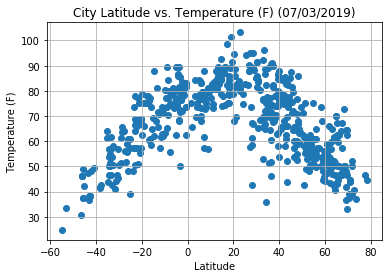

In [8]:
Temperature_Plot = plt.scatter(weather_df['latitude'], weather_df['Temperature'])

plt.grid()
plt.title('City Latitude vs. Temperature (F) (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Temperature_Plot.png')

#### Latitude vs. Humidity Plot

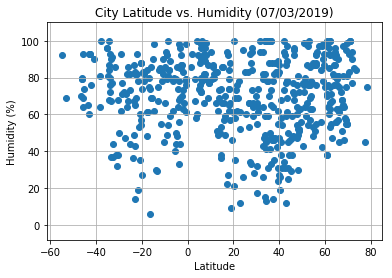

In [9]:
Humidity_Plot = plt.scatter(weather_df['latitude'], weather_df['Humidity %'])

plt.grid()
plt.title('City Latitude vs. Humidity (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(top=110)
plt.savefig('Humidity_Plot.png')

#### Latitude vs. Cloudiness Plot

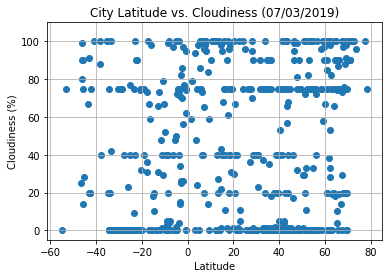

In [10]:
Cloudiness_Plot = plt.scatter(weather_df['latitude'], weather_df['Cloudiness %'])

plt.grid()
plt.title('City Latitude vs. Cloudiness (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(top=110)
plt.savefig('Cloudiness_Plot.png')

#### Latitude vs. Wind Speed Plot

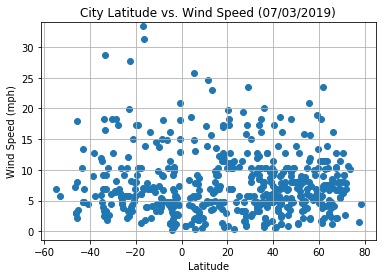

In [11]:
Wind_Plot = plt.scatter(weather_df['latitude'], weather_df['Wind Speed'])

plt.grid()
plt.title('City Latitude vs. Wind Speed (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(top=34)
plt.savefig('Wind_Plot.png')